# Data Exploration - Summary

In [1]:
import sys
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [2]:
from utils.dataset import get_data 

df = get_data()
# show the first rows
df.head()

Loading data from wines: 8000it [00:00, 31930.51it/s]


,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


In [3]:
#make a data exploration
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,8000.000000,8000.000000,7994.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,7992.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6.856625,0.278486,0.334929,6.406219,49.324446,934.437470,285.652011,236.327565,0.045875,35.191567,138.605856,0.994046,3.187270,0.490520,10.507502,6.561750
std,0.841727,0.100296,0.120249,5.104317,29.086962,270.488368,76.881459,71.298176,0.022340,17.079654,42.704772,0.003024,0.150369,0.114318,1.227373,8.757213
min,3.800000,0.080000,0.000000,0.600000,0.035118,93.000000,16.045445,3.000000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,1.000000
25%,6.300000,0.210000,0.270000,1.700000,24.208416,747.295000,233.481329,187.495000,0.036000,23.000000,108.000000,0.991727,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,49.078666,931.025000,284.649716,235.215000,0.043000,34.000000,135.000000,0.993730,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,74.582793,1118.372500,337.955361,284.542500,0.050000,46.000000,168.000000,0.996128,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.230000,65.800000,99.998181,1974.850000,576.761262,514.520000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,99.000000


Dataframe Shape & Types

In [4]:
#Check the shape of the dataset (number of rows and columns) using the shape attribute.
print(df.shape)

#Check the data types of each feature using the dtypes attribute.
df.dtypes

(8000, 17)


wine type                object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
magnesium               float64
flavanoids              float64
minerals                float64
calcium                 float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#group by the column "wine type" and count the number of rows for each wine type in a series
wine_type_count = df.groupby("wine type").size()
print(wine_type_count)

wine type
Cabernet Sauvignon    1940
Chardonnay            1954
Gamay                  232
Merlot                1974
Pinot noir            1900
dtype: int64


## Missing Values 

In [6]:
#create a dataframe containing only missing values from df
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values, columns=['missing values'])
missing_values


,missing values
calcium,8
residual sugar,8
magnesium,8
flavanoids,8
minerals,8
chlorides,8
free sulfur dioxide,8
total sulfur dioxide,8
citric acid,6


In [7]:
df[pd.isna(df["calcium"])]

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1715,Chardonnay,7.2,0.35,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99334,2.93,0.66,10.3,7
2024,Chardonnay,6.5,0.23,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99828,3.15,0.42,9.2,6
2649,Cabernet Sauvignon,7.7,0.39,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99180,3.19,0.58,12.2,7
3781,Chardonnay,5.8,0.28,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.98952,3.32,0.60,12.5,7
5715,Chardonnay,7.2,0.35,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99334,2.93,0.66,10.3,7
6024,Chardonnay,6.5,0.23,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99828,3.15,0.42,9.2,6
6649,Cabernet Sauvignon,7.7,0.39,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99180,3.19,0.58,12.2,7
7781,Chardonnay,5.8,0.28,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.98952,3.32,0.60,12.5,7


### Erkenntnisse: 
* Wir haben Korrelationen bzw. Kolinearitäten zwischen den Features, deswegen ist eine "stupide" Imputation vom mean nicht sinnvoll, da sonst die Werte stark verschoben werden


## Outliers
Detect Outliers in the Dataframe

In [8]:
#create a function which takes 2 parameters: column and dataframe
#the function should calculate the 3rd standard deviation of the column 
#and return the rows which are above and below this value and return the percentage of this values regarding the whole dataframe

def get_outliers(column, dataframe):
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    outliers = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)]
    percentage = len(outliers) / len(dataframe) * 100
    return outliers, percentage

#run function on each column in dataframe which is not categorical
for column in df.columns:
    if df[column].dtype != "object":
        outliers, percentage = get_outliers(column, df)
        print(f"Number of potential outliers for '{column}': {len(outliers)} ({percentage:.2f}%)")




Number of potential outliers for 'fixed acidity': 74 (0.92%)
Number of potential outliers for 'volatile acidity': 138 (1.73%)
Number of potential outliers for 'citric acid': 146 (1.82%)
Number of potential outliers for 'residual sugar': 16 (0.20%)
Number of potential outliers for 'magnesium': 0 (0.00%)
Number of potential outliers for 'flavanoids': 20 (0.25%)
Number of potential outliers for 'minerals': 24 (0.30%)
Number of potential outliers for 'calcium': 24 (0.30%)
Number of potential outliers for 'chlorides': 166 (2.08%)
Number of potential outliers for 'free sulfur dioxide': 50 (0.62%)
Number of potential outliers for 'total sulfur dioxide': 22 (0.27%)
Number of potential outliers for 'density': 6 (0.07%)
Number of potential outliers for 'pH': 60 (0.75%)
Number of potential outliers for 'sulphates': 80 (1.00%)
Number of potential outliers for 'alcohol': 2 (0.03%)
Number of potential outliers for 'quality': 70 (0.88%)


## Daten-Exploration
- Häufigkeitsverteilungen (in Bezug auf die 3. Standardabweichung)
- Werteverteilung der Features
- Korrelationen



### Häufigkeitsverteilungen (in Bezug auf die 3. Standardabweichung)


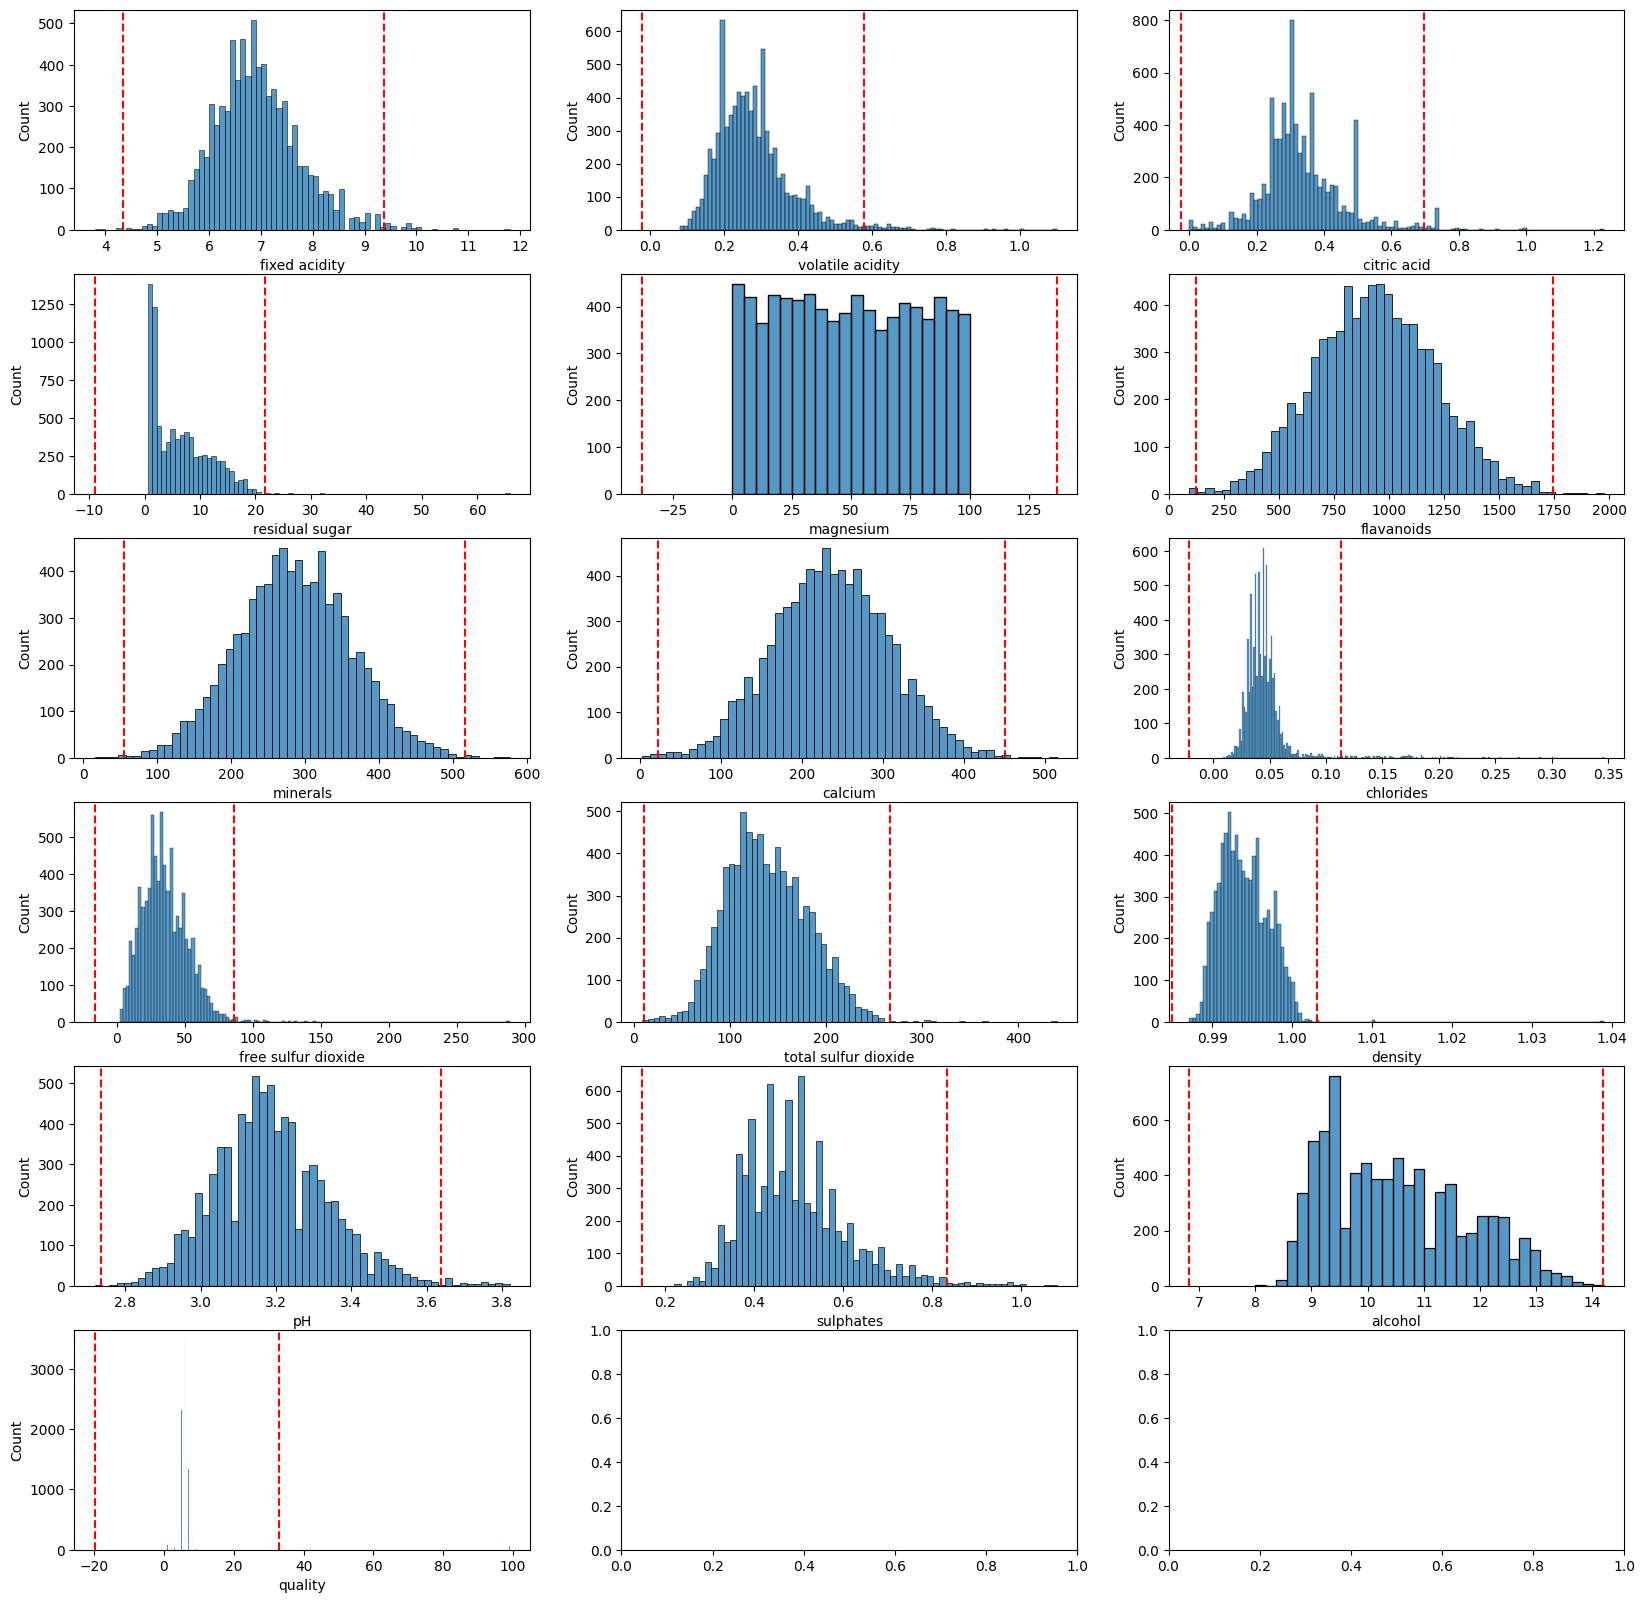

In [9]:
#show me the distribution of each column besides its 3rd standard deviation in one figure
fig, axes = plt.subplots(6, 3, figsize=(20, 20))
for i, column in enumerate(df.select_dtypes(exclude='object').columns):
    mean = df[column].mean()
    std = df[column].std()
    sns.histplot(data=df, x=column, ax=axes[i//3][i%3])
    axes[i//3][i%3].axvline(mean + 3*std, color='r', linestyle='--')
    axes[i//3][i%3].axvline(mean - 3*std, color='r', linestyle='--')
plt.show()

### Erkenntnisse:
* Auffälligkeiten:
    * `volatile acidity`
    * `chlorides`
    * `free sulfur dioxide`
    * `density`
    * `residual sugar`
    * `sulphates`
    * **`quality`** &rarr; möglich, dass falsch gelabeled wurde
    
* Starke rechts-schiefe bei `residual sugar` 
* Sonstige Features normal verteilt

### Verteilung des Labels

<Axes: >

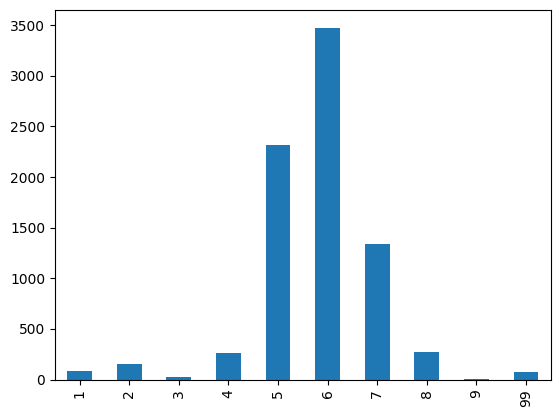

In [10]:
#show me the distribution of the target variable 'quality' in a bar chart 
df['quality'].value_counts().sort_index().plot(kind='bar', logy=False)

### Erkenntnisse:
Es wurden mit hoher Wahrscheinlichkeit einige der Daten falsch gelabelet, da der Ausreiser-Wert `99` sich stark von den anderen Werten abhebt

### Werteverteilung der Features


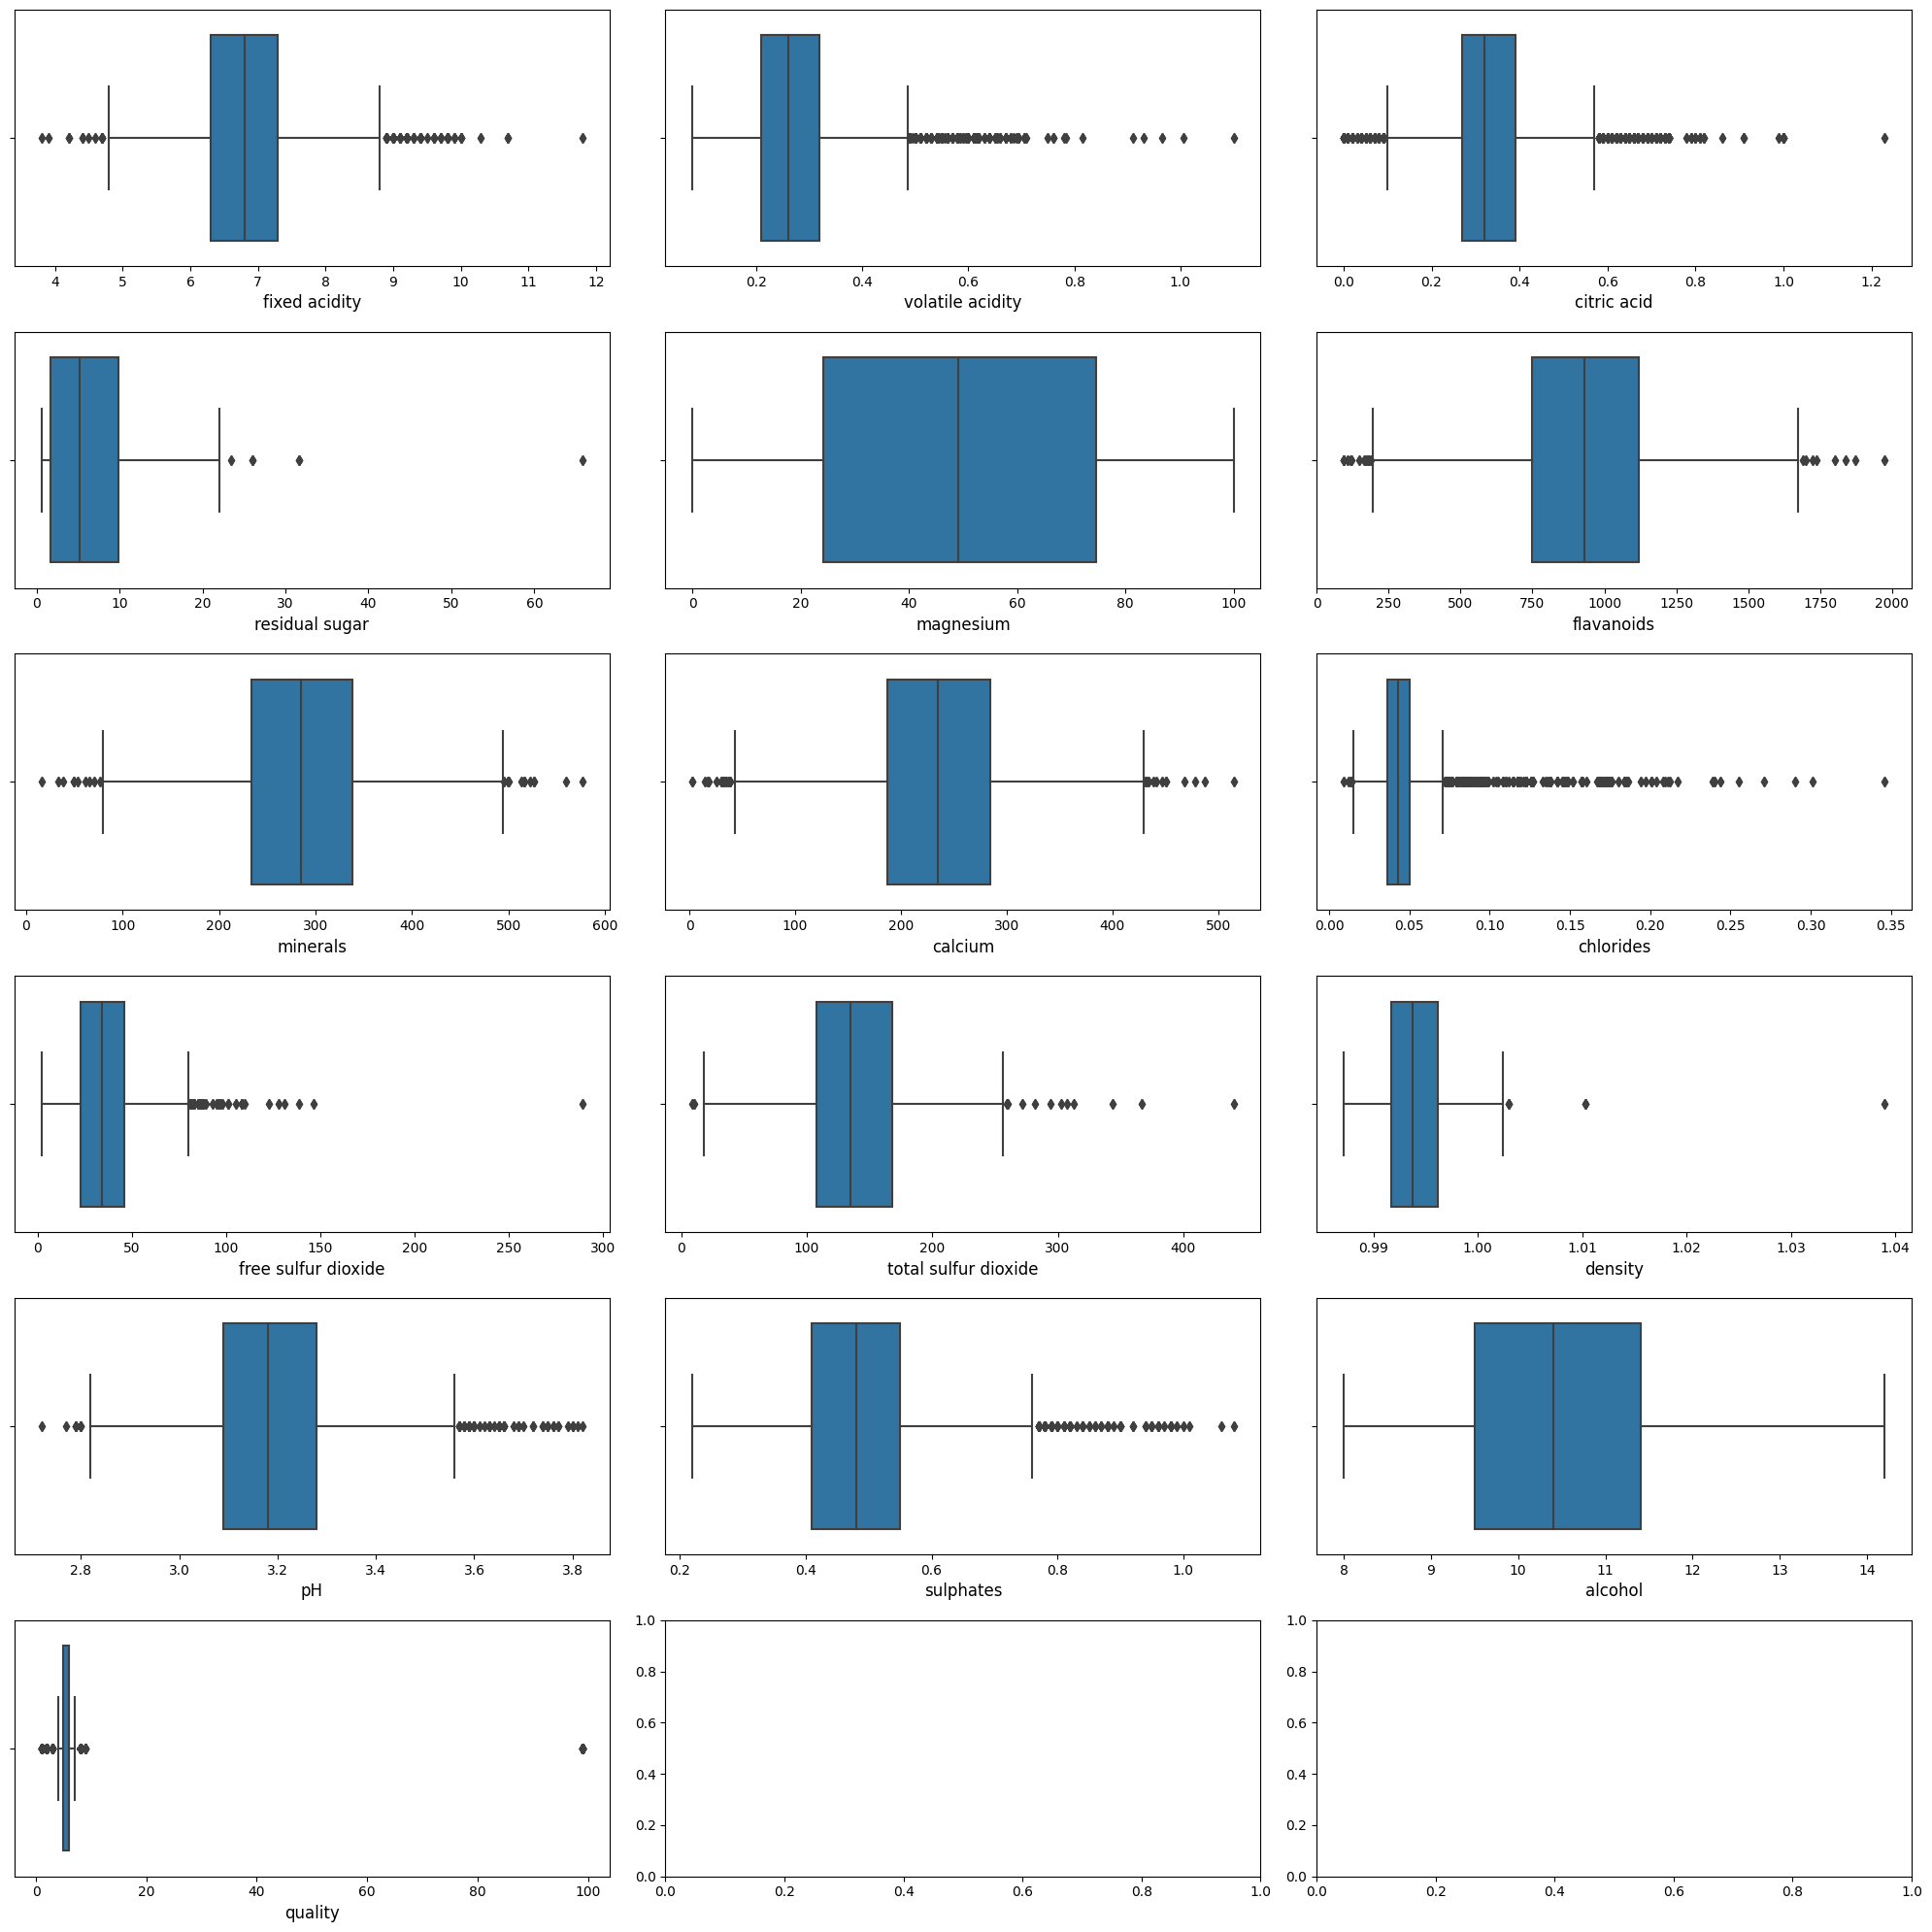

In [11]:
#plot a boxplot each numeric column in the dataframe as one figure with 3 rows and 3 columns
fig, axes = plt.subplots(6, 3, figsize=(20, 20))
for i, column in enumerate(df.select_dtypes(exclude='object').columns):
    sns.boxplot(x=column, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xlabel(column, fontsize=12)
plt.tight_layout()

### Erkenntnisse:
* Bestätigung der vorherigen Explorationen bzgl. der Outliers (s. `chlorides`, `volatile acidity`)

### Korrelationen

Korrelation zwischen Label und Features: 
quality                 1.000000
alcohol                 0.038611
chlorides               0.037501
density                 0.024686
magnesium               0.019086
calcium                 0.017933
fixed acidity           0.017012
total sulfur dioxide    0.016741
citric acid             0.016598
minerals                0.009412
free sulfur dioxide     0.009390
residual sugar          0.008310
flavanoids              0.007774
sulphates               0.005710
volatile acidity        0.004871
pH                      0.003015
Name: quality, dtype: float64


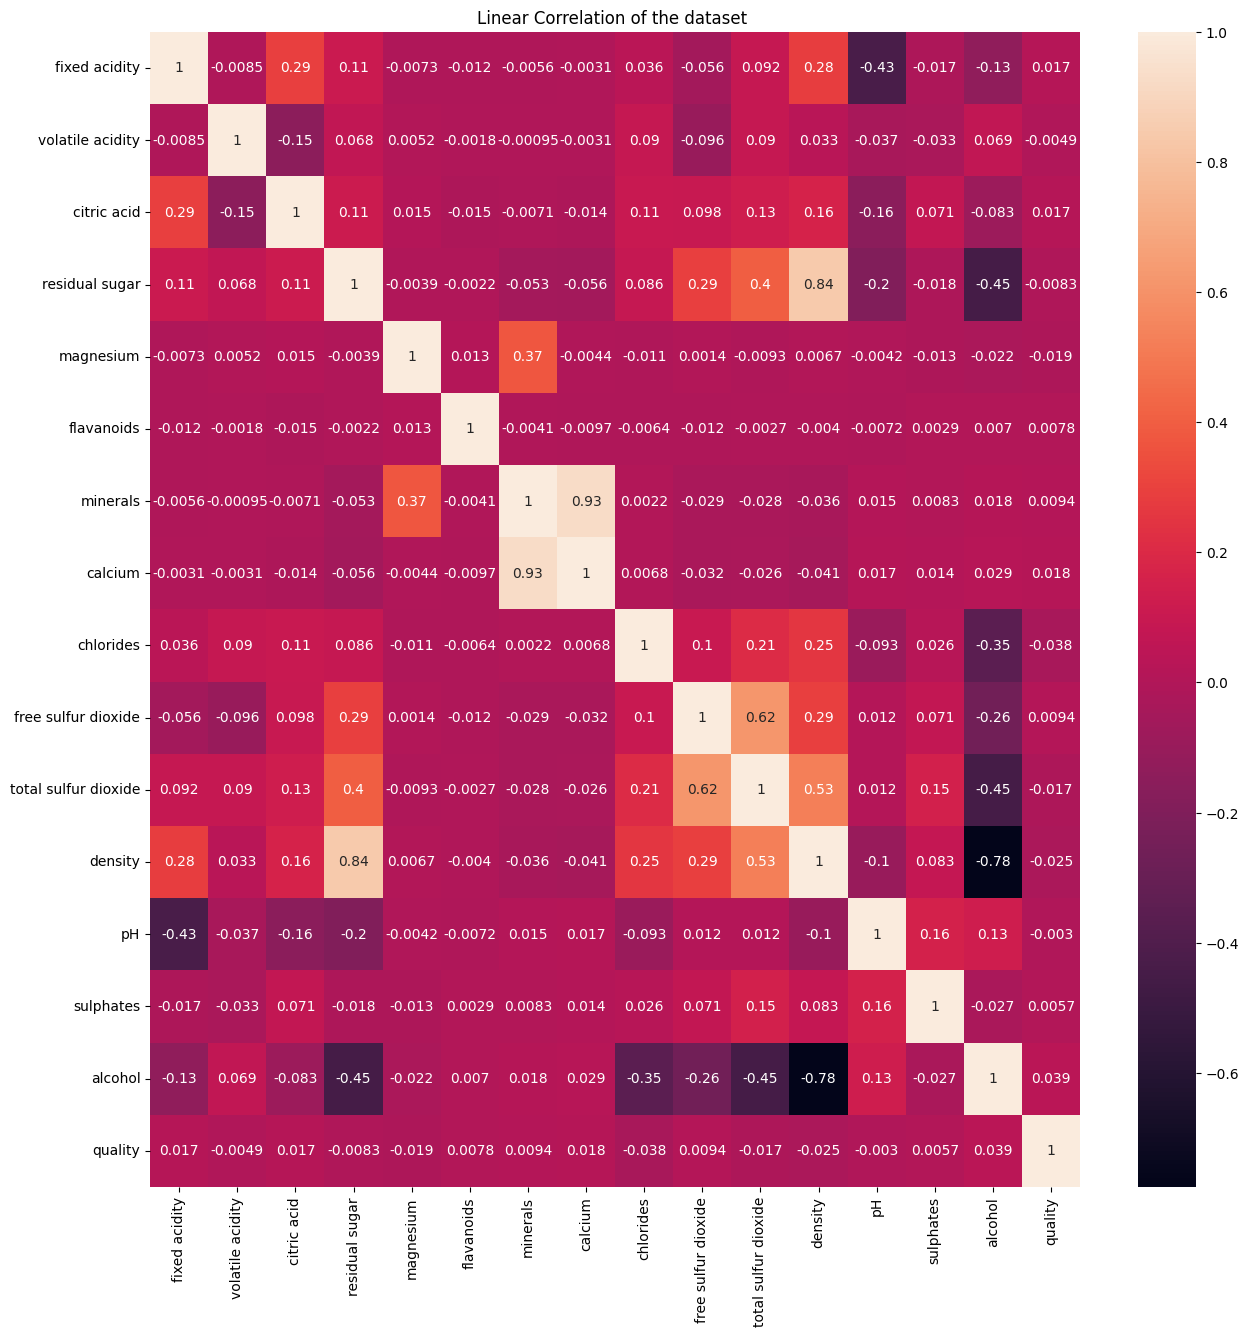

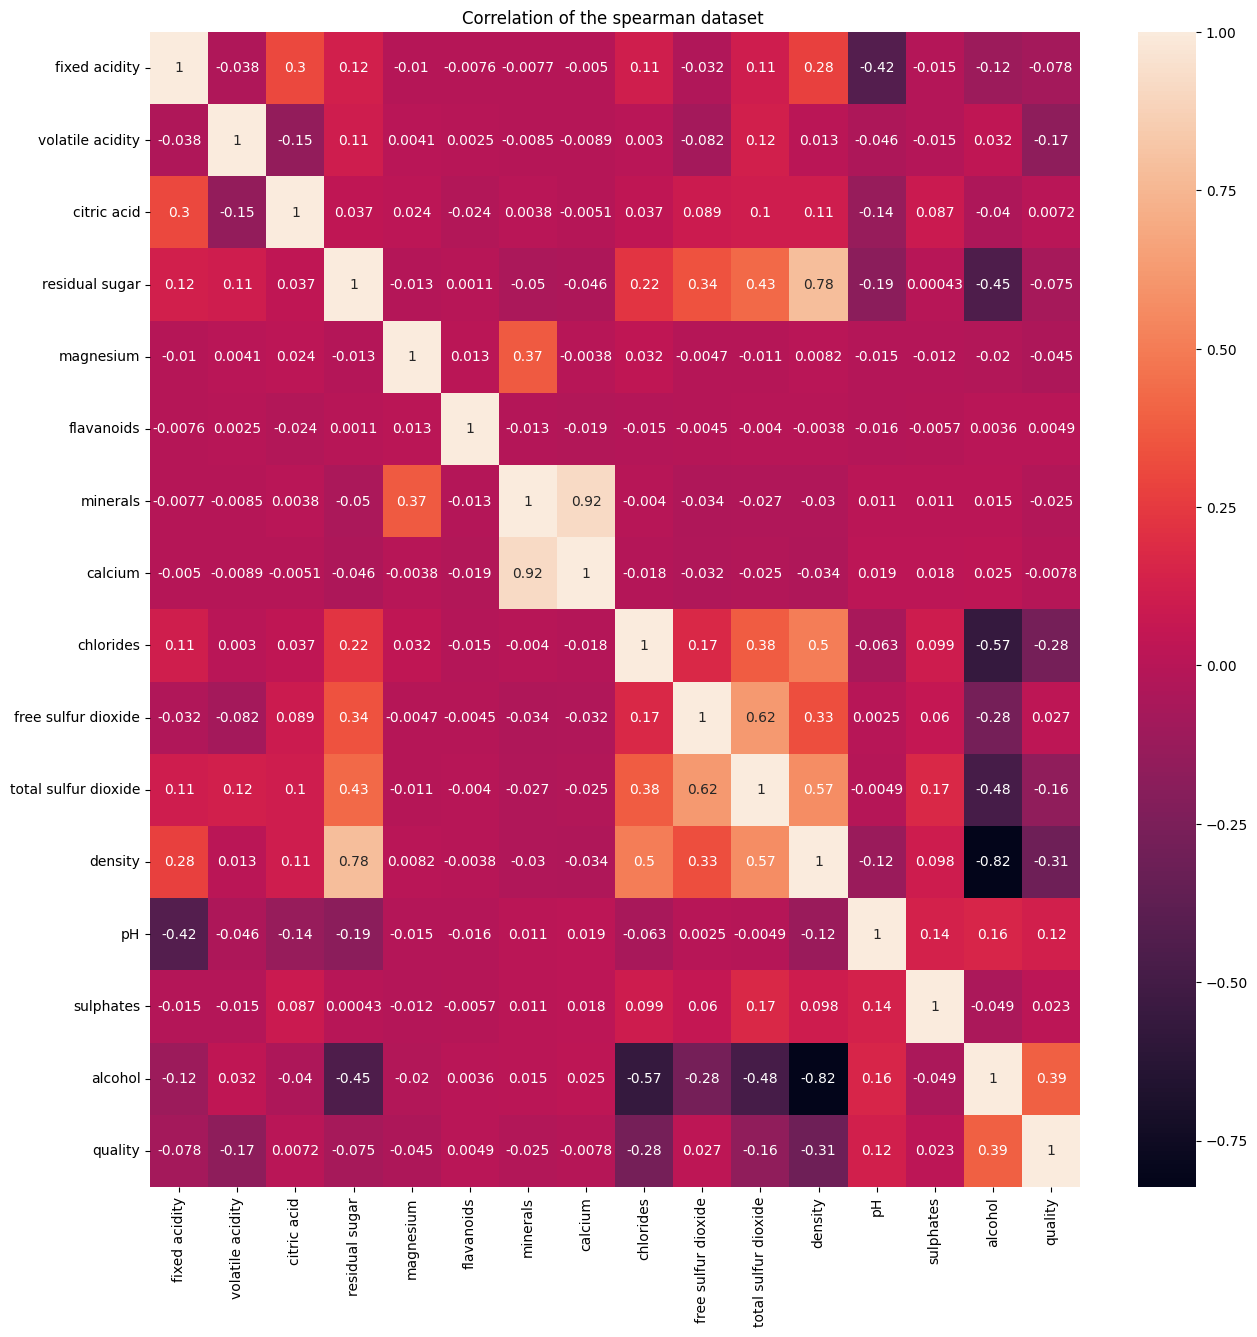

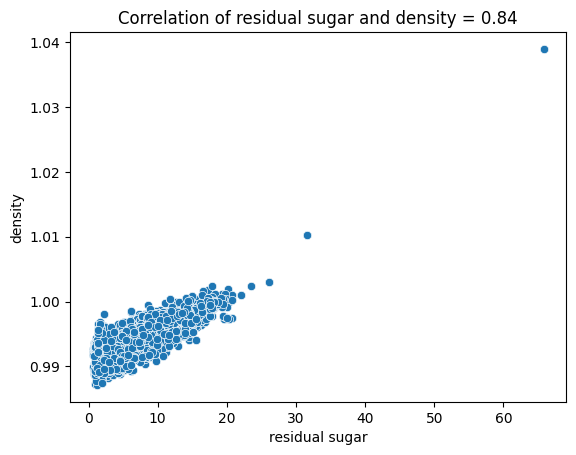

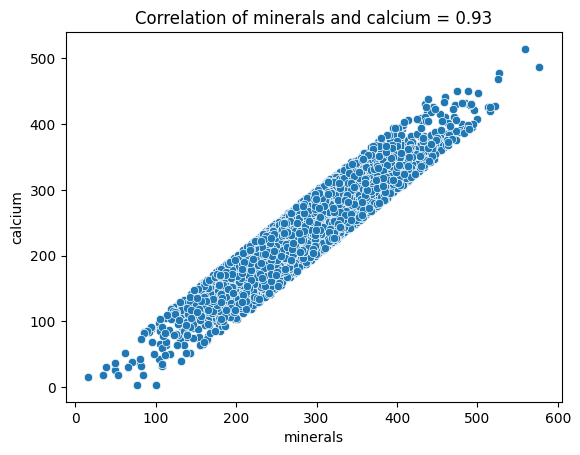

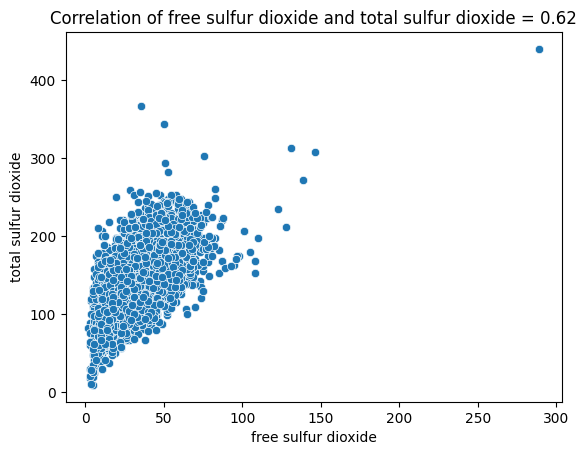

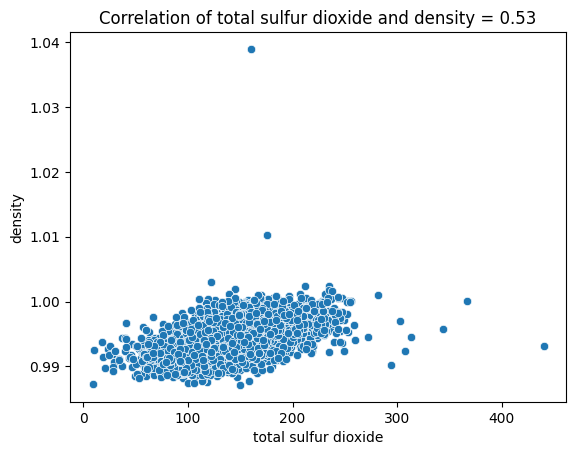

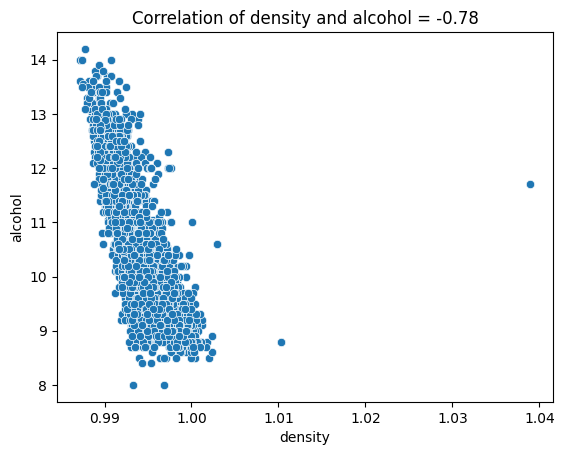

In [12]:
#cleaning of the dataset - just a copy of the original dataset
dfCleaned = df.copy()
# clean data from missing values and save it to a the dfCleaned
dfCleaned = dfCleaned.dropna()
#just hold the numeric columns
dfCleaned = dfCleaned.select_dtypes(exclude='object')

#caluclate correlation of only the numeric features with label (quality)
corrOfQuality = dfCleaned.corr()["quality"].abs().sort_values(ascending=False)
print("Korrelation zwischen Label und Features: ")
print(corrOfQuality)

#show me correlation between columns as big heatmap with values in the middle of each cell
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dfCleaned.corr(), annot=True, ax=ax)
plt.title("Linear Correlation of the dataset ")
plt.show()

#calcualte the spearman correlation of the dataframe and save it to a new dataframe
dfSpear = dfCleaned.corr(method='spearman')
#display the spearman correlation dataframe as heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dfSpear, annot=True, ax=ax)
plt.title("Correlation of the spearman dataset ")
plt.show()

# create a scatterplot of the dataframe with only the columns correlation higher than 0.5 and lower than -0.5 and dont duplicate the plots
# display the correlation value in the title of each plot
# show me the plots in a 3x3 grid
for i, column in enumerate(dfCleaned.columns):
    for j, column2 in enumerate(dfCleaned.columns):
        if i < j:
            corr = dfCleaned[column].corr(dfCleaned[column2])
            if corr > 0.5 or corr < -0.5:
                sns.scatterplot(x=column, y=column2, data=dfCleaned)
                plt.title(f"Correlation of {column} and {column2} = {corr:.2f}")
                plt.show()

### Erkenntnisse:
* hohe Kollinearität zwischen
    * `minerals` & `calcium` ==> `calcium` behalten, weil höhere Korrelation zu Label (quality)
    * `density` & `alcohol` ==> `alcohol` behalten, weil höhere Korrelation zu Label (quality)
    * `density` & `residual sugar` ==> `residual sugar` behalten, weil `density` durch `alcohol` schon rausgefallen ist
    * `free sulfur dioxide` & `total sulfur dioxide` ==> `total sulfur dioxide` behalten, weil höhere Korrelation zu Label (quality)

In [13]:
#calculate of variance inflation factor (VIF) for each column in the dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfCleaned.values, i) for i in range(dfCleaned.shape[1])]
vif["features"] = dfCleaned.columns 
#display the dataframe with the VIF values in descending order
vif.sort_values(by='VIF Factor', ascending=False)
print(vif)

     VIF Factor              features
0     94.361629         fixed acidity
1      9.888050      volatile acidity
2     10.203525           citric acid
3      3.817743        residual sugar
4           inf             magnesium
5     12.957082            flavanoids
6           inf              minerals
7           inf               calcium
8      6.279391             chlorides
9      9.201612   free sulfur dioxide
10    25.191431  total sulfur dioxide
11  1090.128625               density
12   619.246858                    pH
13    20.579110             sulphates
14   120.287686               alcohol
15     1.567508               quality


/opt/anaconda3/envs/data-science/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### Erkenntnisse:


* hohe Multikollinearität bei > 10
    * `magnesium`, `minerals`, `calcium`: "infinite ∞" -> `minerals` rauswerfen, da schon Kolinerität zu `calcium` gecheckt wurde
    * `density`: "1090", schwierige Entscheidung, da  Kollinearität von -0.31 mit dem Label Qualität besitzt (spearman). 
    * `pH`: "619", schwierige Entscheidung, da pH  Kollinearität von 0.12 mit dem Label Qualität besitzt (spearman). 
    * `alcohol`: "120", bleibt da große Kollinerität von 0.4 zwischen Feature und Label 
    * `fixed acidity`: "94", kann raus da nur geringe Kollinearität von ~0.015 mit dem Label 

    
 * Iteratives Vorgehen beim Eliminieren der Features
    

    VIF Factor              features
0     9.411783      volatile acidity
1     9.195527           citric acid
2     3.222213        residual sugar
3     3.804131             magnesium
4    12.280500            flavanoids
5    11.457355               calcium
6     5.497758             chlorides
7    14.144752  total sulfur dioxide
8    19.018046             sulphates
9    36.503534               alcohol
10    1.564933               quality


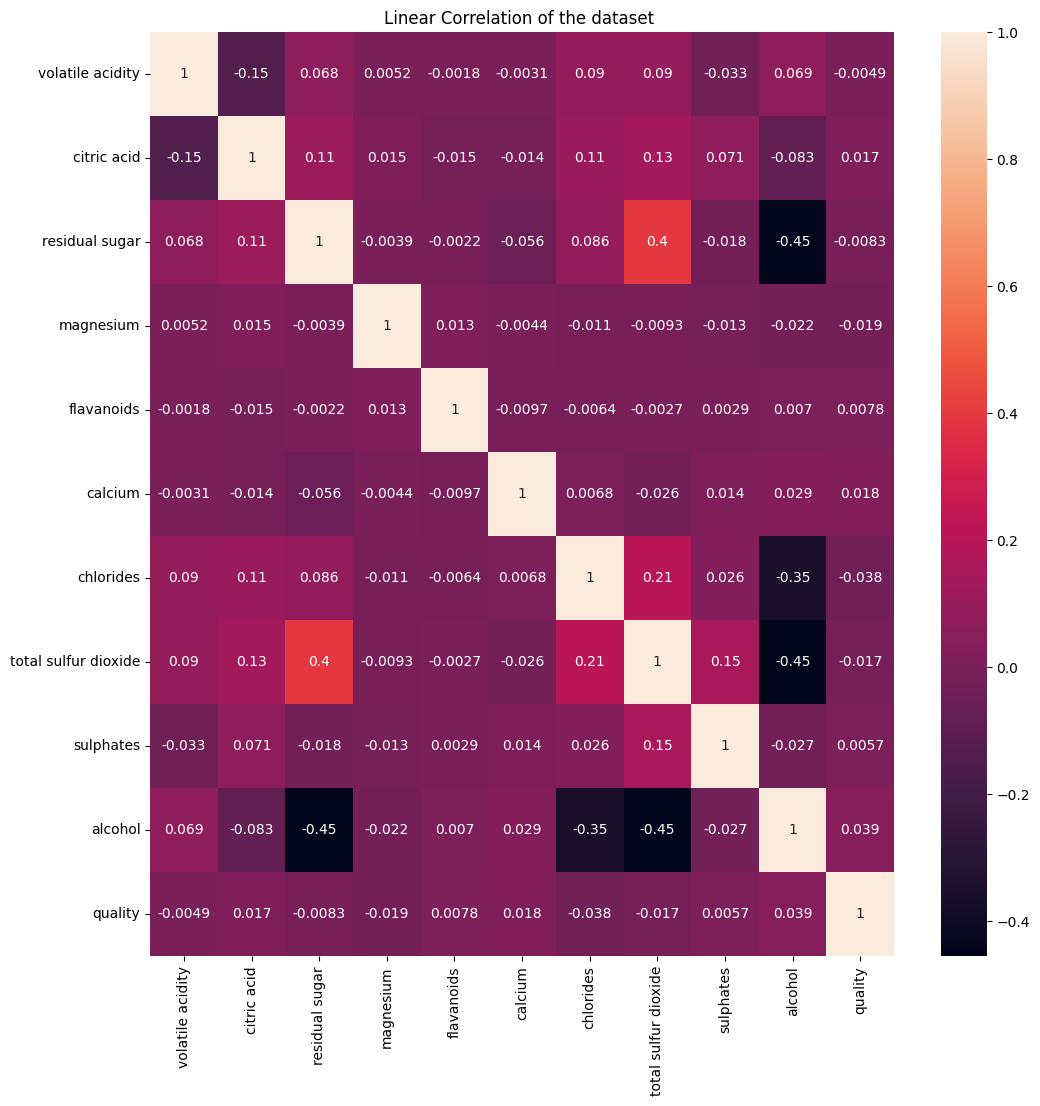

In [14]:
dfCleaned.drop(columns=['minerals'], inplace=True)
dfCleaned.drop(columns=['fixed acidity'], inplace=True)
dfCleaned.drop(columns=['pH'], inplace=True)
dfCleaned.drop(columns=['free sulfur dioxide'], inplace=True)
dfCleaned.drop(columns=['density'], inplace=True)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfCleaned.values, i) for i in range(dfCleaned.shape[1])]
vif["features"] = dfCleaned.columns 

#display the dataframe with the VIF values in descending order
vif.sort_values(by='VIF Factor', ascending=False)
print(vif)

#show me correlation between columns as big heatmap with values in the middle of each cell
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfCleaned.corr(), annot=True, ax=ax)
plt.title("Linear Correlation of the dataset ")
plt.show()

### Erkenntnisse:

* Eventuell sollte "Density" und "pH" weiterhin im Datensatz bleiben, dass kann allerdings erst nach der Data Preparation beziehungsweise dem Training fundiert entschieden werden. 
    

## Entscheidung, ob Weintyp "Gamay" in einem separaten Modell trainiert werden sollte
- Datenbereinigung
- Regressions-Plot für jedes Feature und dem Label je Wein-Typ


<Axes: title={'center': 'Wine type count'}, ylabel='wine type'>

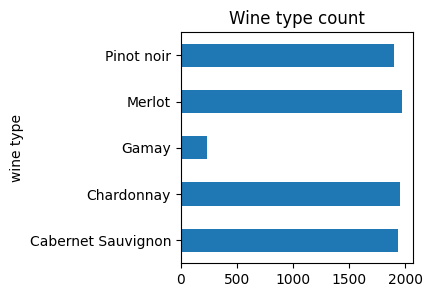

In [15]:
#group by the column "wine type" and count the number of rows for each wine type in a series
wine_type_count = df.groupby("wine type").size()
wine_type_count.plot(kind='barh', logy=False, figsize=(3, 3), title="Wine type count")

<Axes: title={'center': 'Avg. wine type quality'}, ylabel='wine type'>

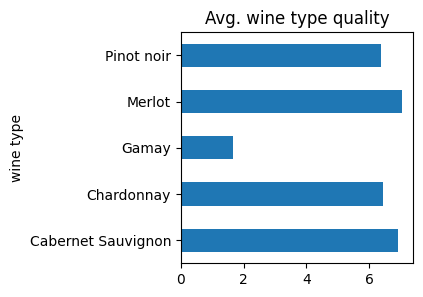

In [16]:
#calculate the average "quality" for each wine type
wine_type_quality = df.groupby("wine type")["quality"].mean()
wine_type_quality.plot(kind='barh', logy=False, figsize=(3, 3), title="Avg. wine type quality")

(7196, 17)


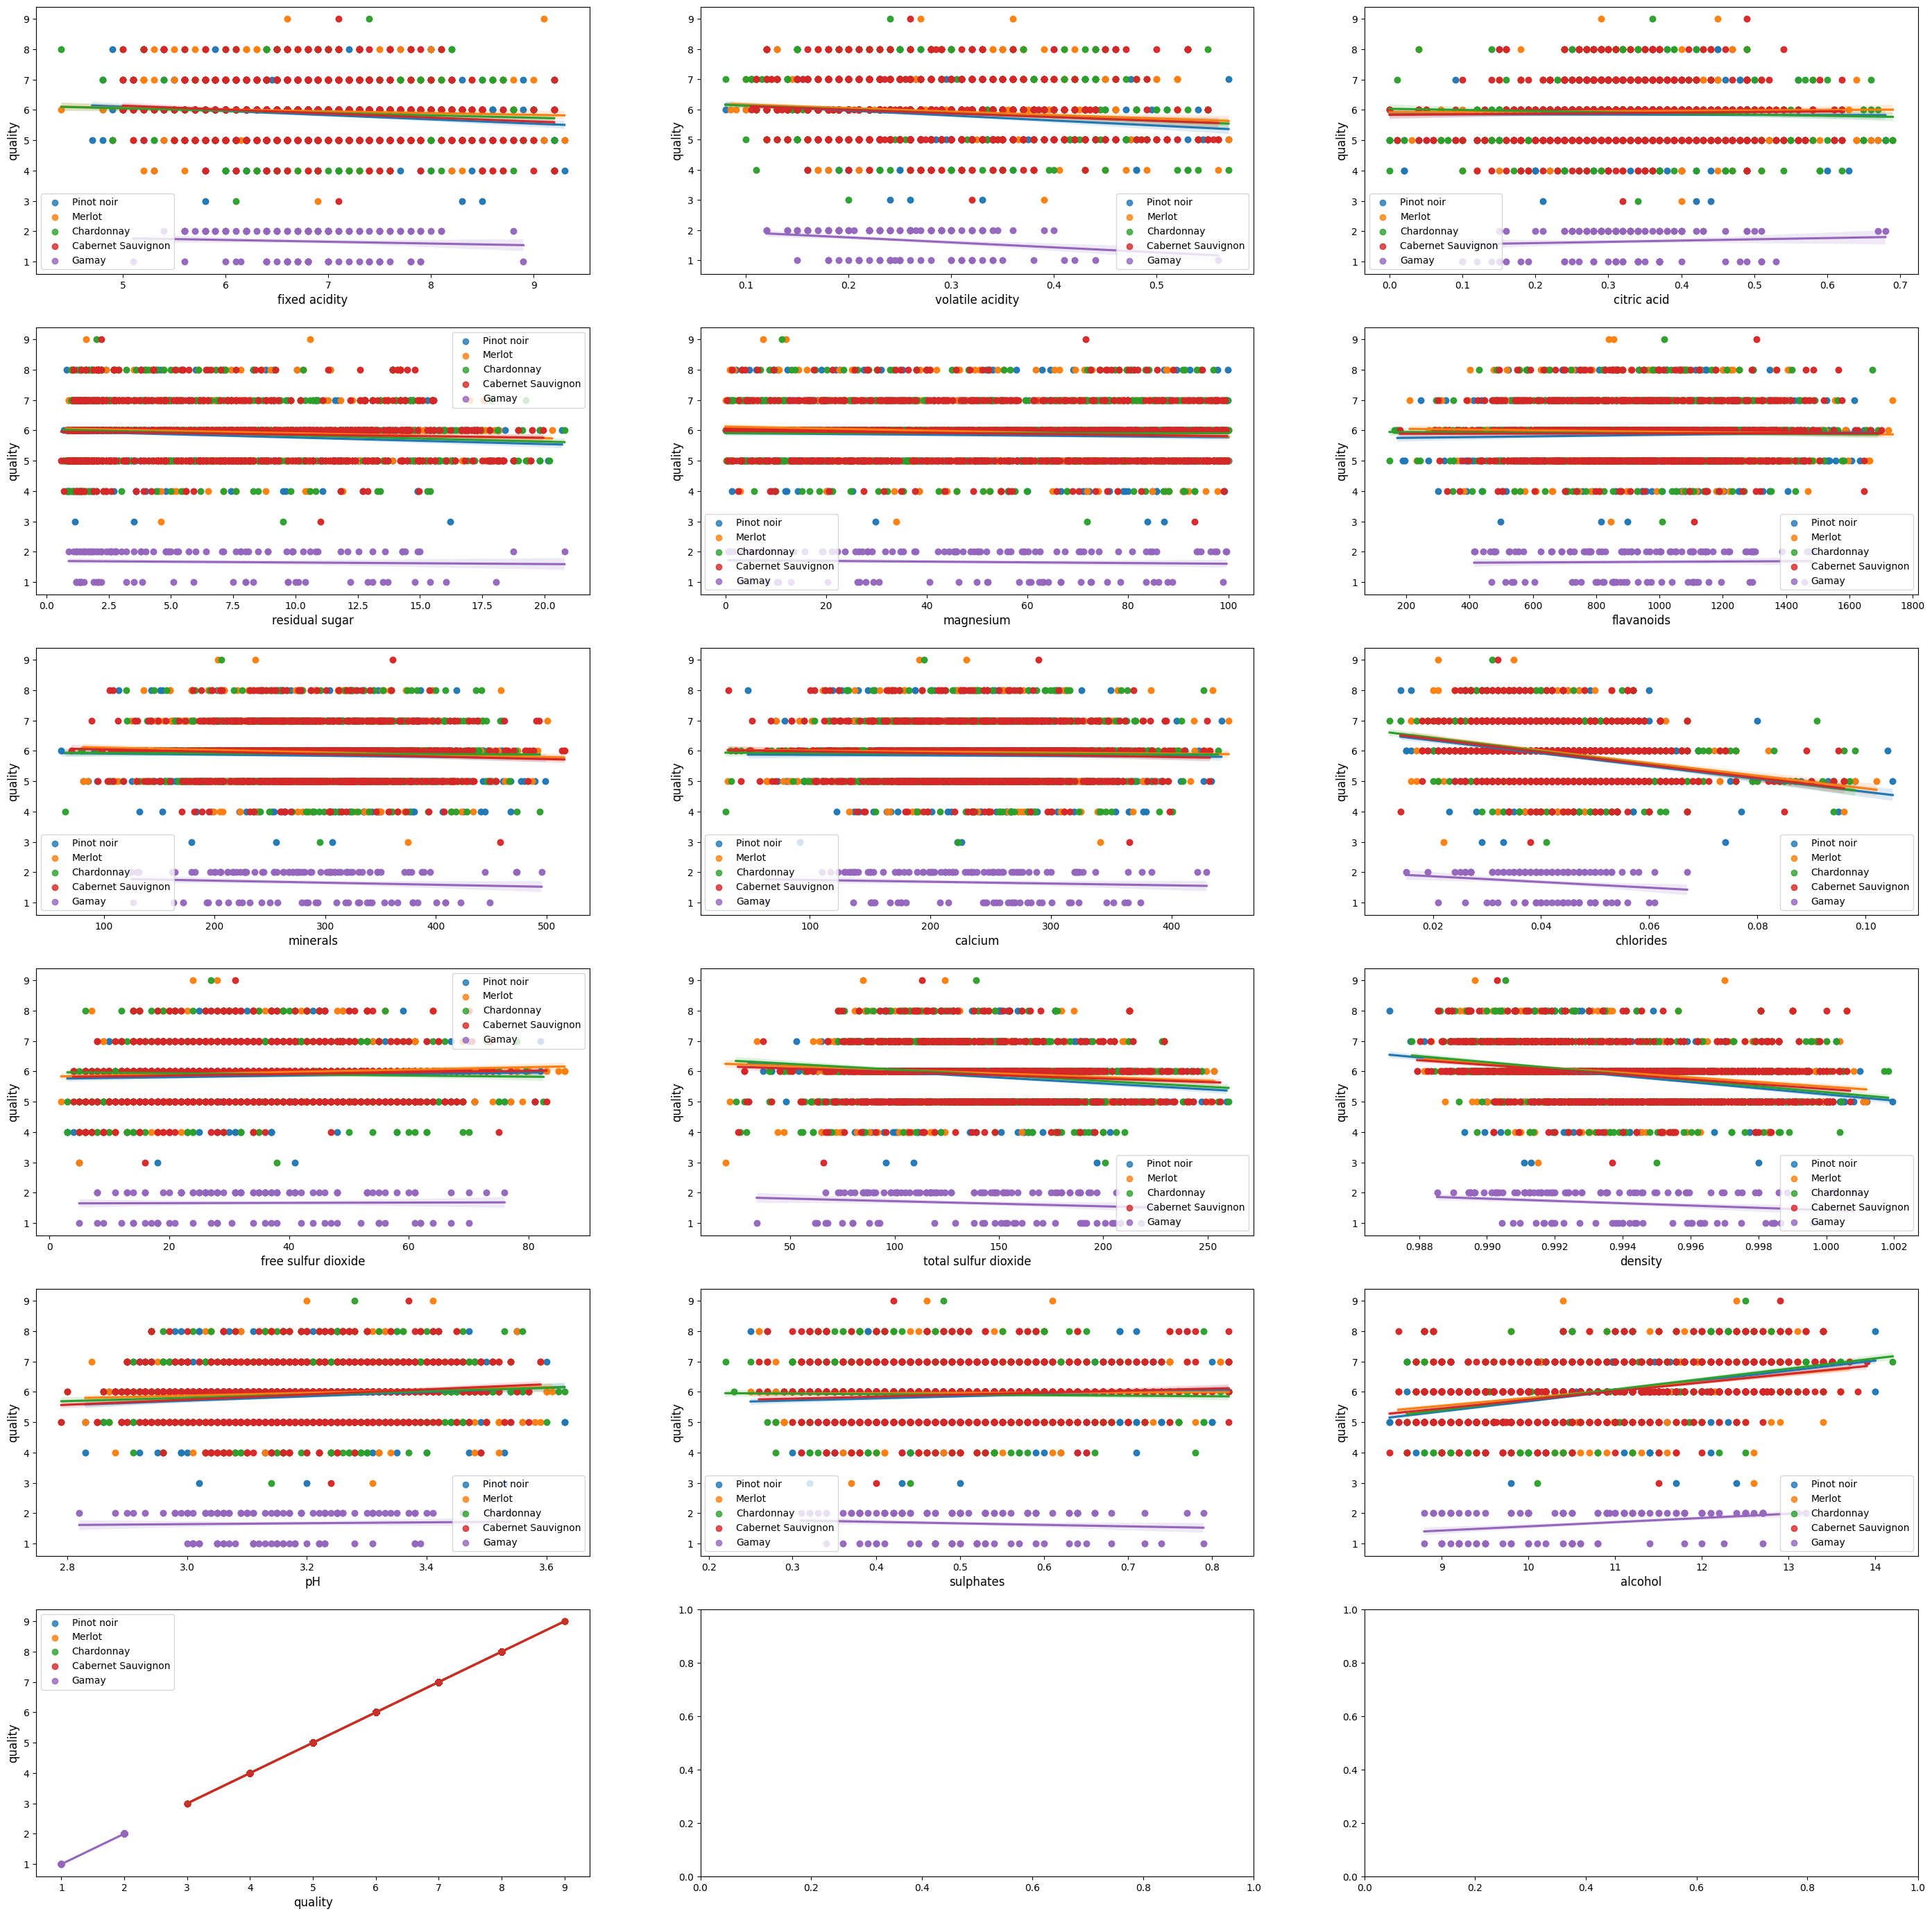

In [17]:
# clean data from outliers and save it to a new dataframe
df_clean = df.copy()
for column in df_clean.select_dtypes(exclude='object').columns:
    mean = df_clean[column].mean()
    std = df_clean[column].std()
    df_clean = df_clean[(df_clean[column] >= (mean - 3 * std)) & (df_clean[column] <= (mean + 3 * std))]

# clean data from missing values and save it to a the df_clean
df_clean = df_clean.dropna()

# clean data with normal distribution and save it to a the df_clean
#df_clean = df_clean[(df_clean['residual sugar'] < 10) & (df_clean['free sulfur dioxide'] < 50) & (df_clean['total sulfur dioxide'] < 150) & (df_clean['sulphates'] < 1.5)]

# show me the shape of the new dataframe
print(df_clean.shape)


# show me the correlation between every feature and the label (quality) compared with every wine type (object) in a linear regression plot
fig, axes = plt.subplots(6, 3, figsize=(35, 35))
for i, column in enumerate(df_clean.select_dtypes(exclude='object').columns):
    for j, wine_type in enumerate(df_clean['wine type'].unique()):
        # show a legend in the plot
        sns.regplot(x=column, y='quality', data=df_clean[df_clean['wine type'] == wine_type], ax=axes[i//3][i%3], label=wine_type)
        axes[i//3][i%3].set_xlabel(column, fontsize=12)
        axes[i//3][i%3].set_ylabel('quality', fontsize=12)
        axes[i//3][i%3].legend()

/var/folders/qf/_mzt5nz96y12mx5szzg62j480000gn/T/ipykernel_72383/3178070537.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rel = df_rel[df_rel['wine type_Gamay'] == 0].sample(n=200, random_state=42).append(df_rel[df_rel['wine type_Gamay'] == 1].sample(n=200, random_state=42))


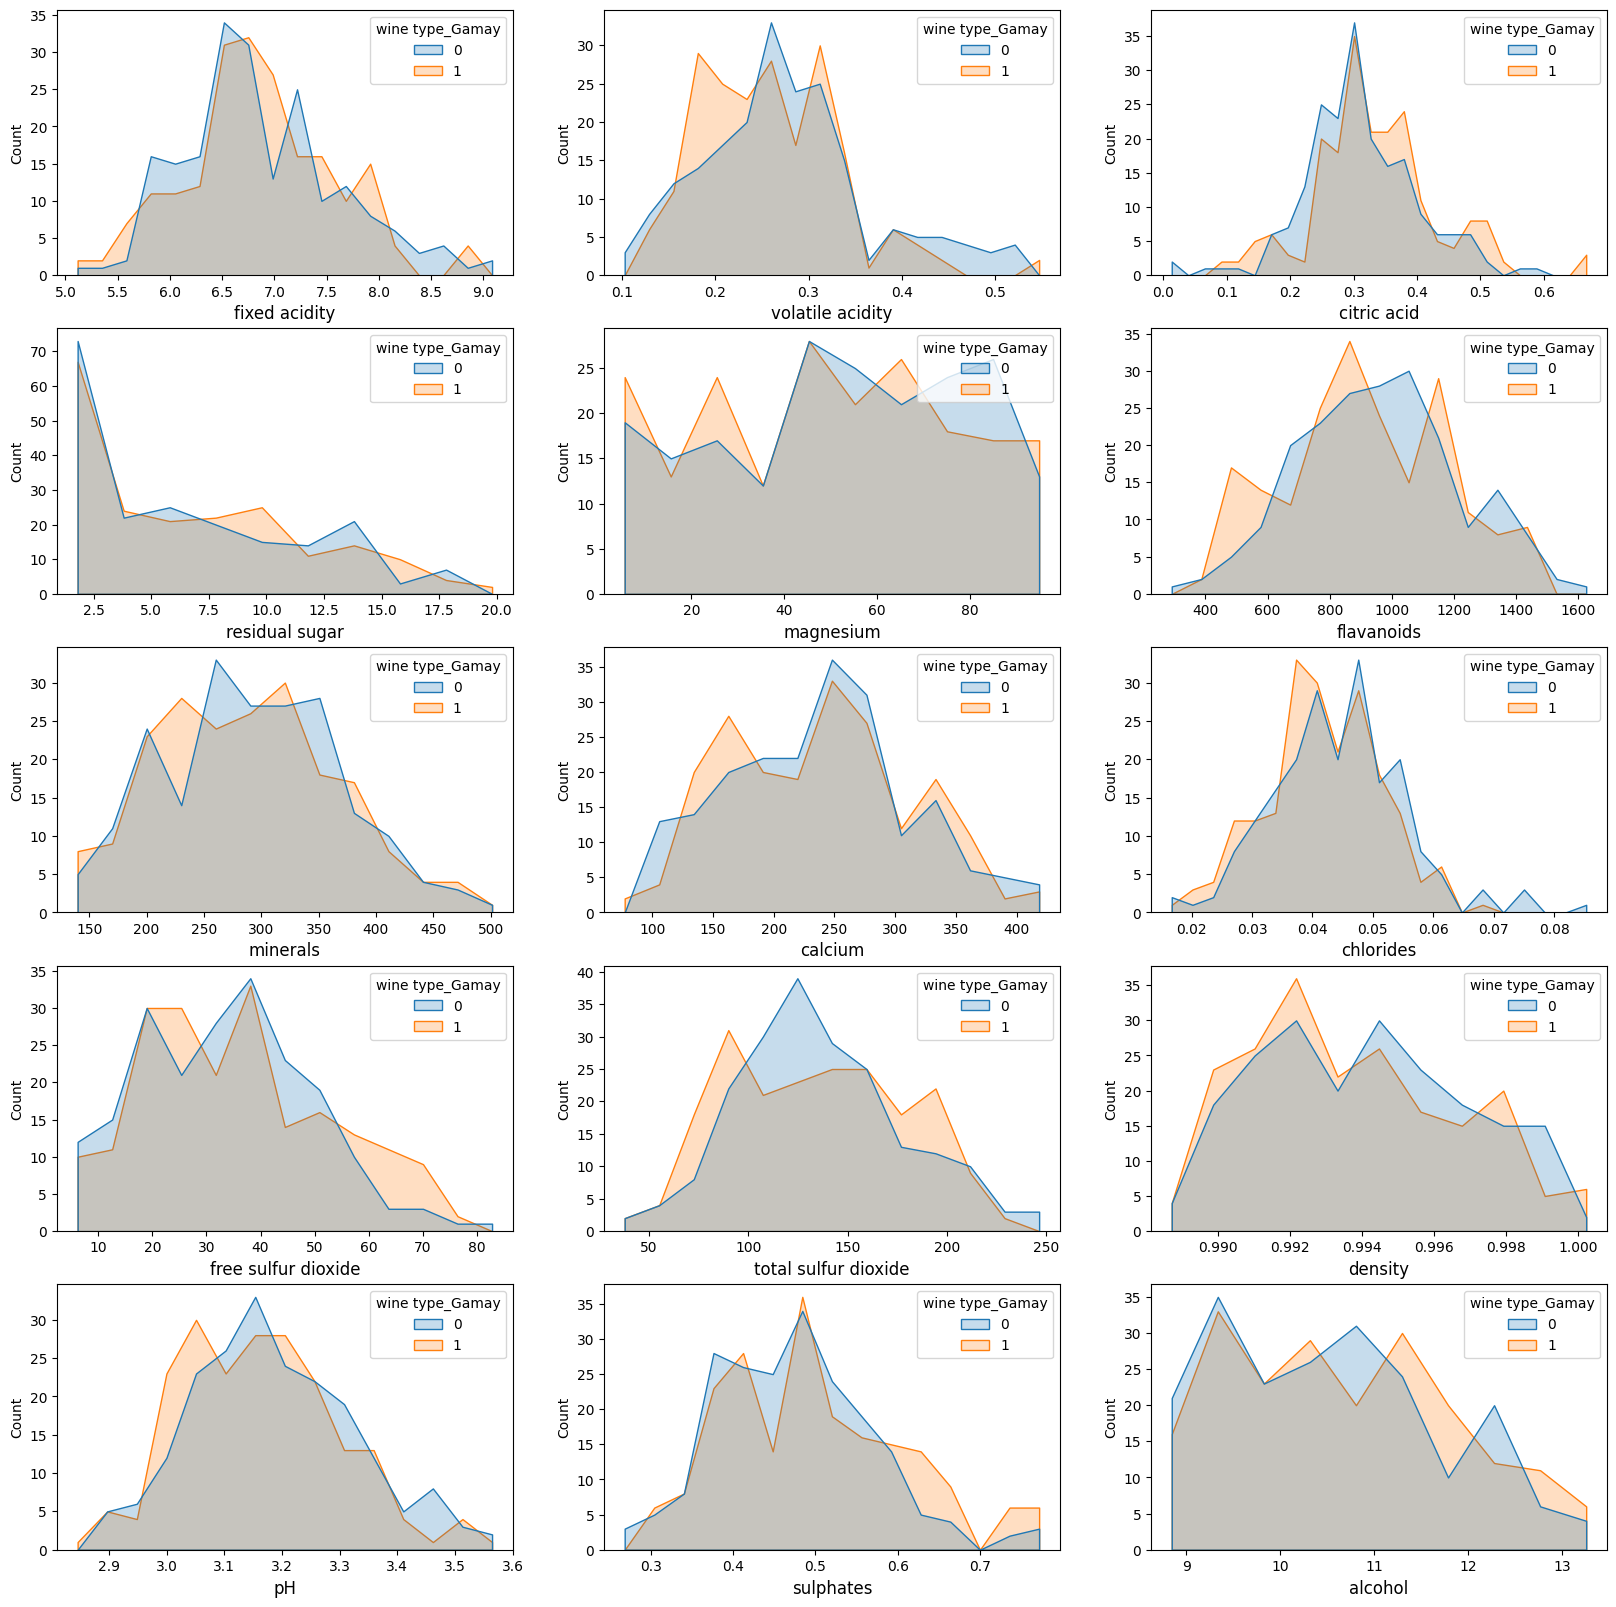

In [18]:
#compare the features with a histplot and color the data points by "wine type_Gamay" 

#transform wine type to numeric with one hot encoding
df_rel = pd.get_dummies(df_clean, columns=['wine type'])

#bring the count of Gamay to the same level as the other wine types to make the comparison easier
df_rel = df_rel[df_rel['wine type_Gamay'] == 0].sample(n=200, random_state=42).append(df_rel[df_rel['wine type_Gamay'] == 1].sample(n=200, random_state=42))

#make histplot for each feature and color the data points by "wine type_Gamay" with sns.histplot
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
for i, column in enumerate(df_rel[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'magnesium', 'flavanoids', 'minerals', 'calcium', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].select_dtypes(exclude='object').columns):
    sns.histplot(data=df_rel, x=column, hue='wine type_Gamay', ax=axes[i//3][i%3], element="poly")
    axes[i//3][i%3].set_xlabel(column, fontsize=12)
plt.show()

### Erkenntnisse:
-> Die Ausprägung der Features vom Weintyp Gamay ist sehr ähnlich zu den anderen Weintypen. 

-> Das Label Quality ist allerdings sehr unterschiedlich zu den anderen Weintypen ausgeprägt. 

= Das heißt, dass die Features nicht ausschlaggebend für die Qualität zu sein scheinen, sondern der Weintyp. 

= Daher macht es vermutlich Sinn, die Weintypen in zwei verschiedene Modelle zu packen.

### Dimensionality Reduction 
* Principal component analysis (PCA) anwenden, um die Anzahl der Features zu reduzieren. 
* Hilft dabei, den Einfluss aller Variablen auf die Quality übersichtlich in einem Plot darzustellen. 

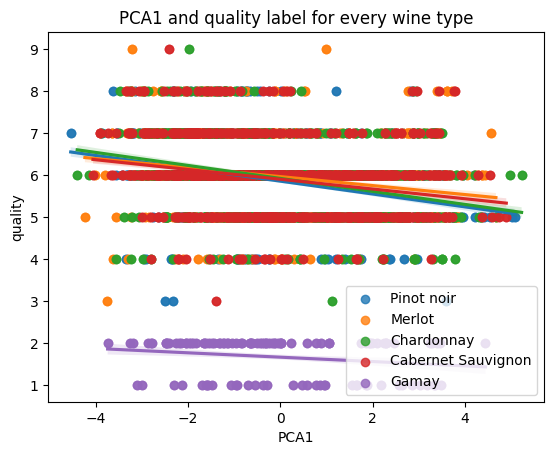

In [19]:
#use principal component analysis (PCA) to reduce the number of features. 
#The goal is to reduce the number of features to 1 and plot the data points in a scatter plot to compare between the PCA features and the quality label.

# split data into features and label
X = df_clean.drop(['quality', 'wine type'], axis=1)
y = df_clean['quality']

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
# show me the correlation between the PCA1 and the quality label for every wine type (object) in a linear regression plot
for wine_type in df_clean['wine type'].unique():
    sns.regplot(x=X_pca[df_clean['wine type'] == wine_type, 0], y=y[df_clean['wine type'] == wine_type], label=wine_type)
plt.xlabel('PCA1')
plt.ylabel('quality')
plt.legend()
plt.title("PCA1 and quality label for every wine type")
plt.show()

### Korrelationen (One-Hot-Encoded)
including the categorical feature "wine type" to understand how Gamay is related to the other features and the quality label

<Axes: title={'center': 'Correlation of wine types'}>

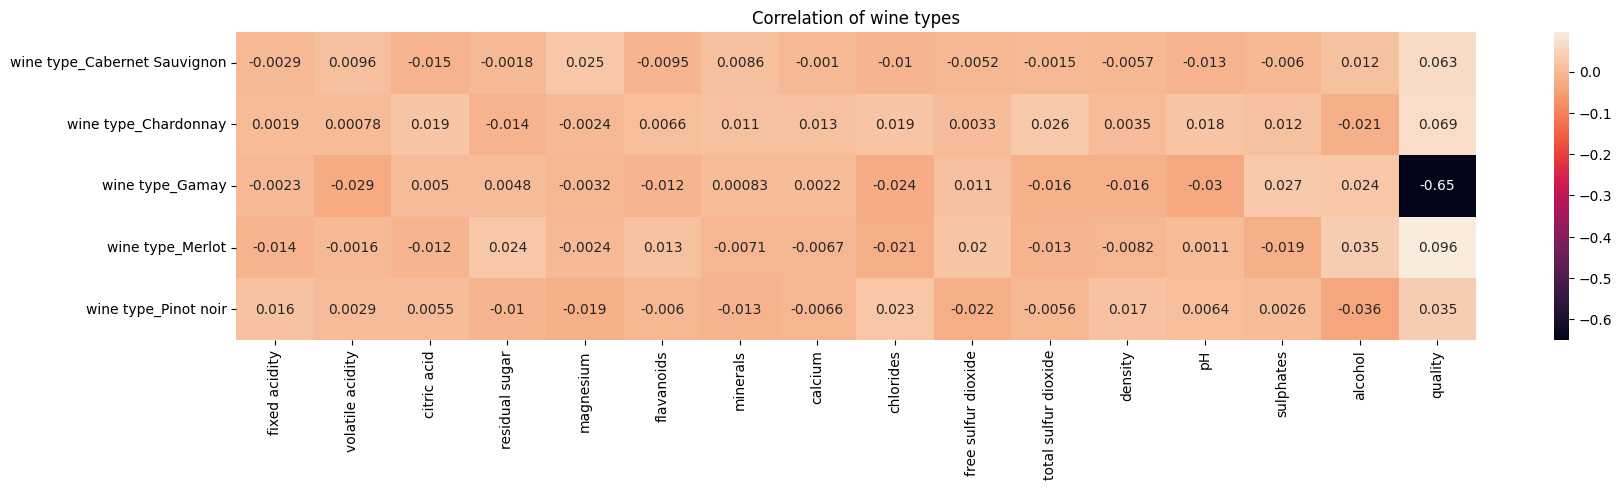

In [20]:
#check the categorical feature "wine type" for Gamay

#transform wine type to numeric with one hot encoding
df_clean = pd.get_dummies(df_clean, columns=['wine type'])

#show correlation matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.title("Correlation of wine types")
df_clean_corr = df_clean.corr()
sns.heatmap(df_clean_corr.iloc[16:, :16], annot=True)

### Erkenntnisse "Gamay":
- Wine Type Gamay ist in Bezug auf die numerischen Features nicht anders verteilt, als die anderen Wine Types
- Das Label "quality" ist bei Gamay anders verteilt, als bei den anderen Wine Types. Gamay (1-2) alle anderen (3-9)
- nach dem OneHotEncoding ist sichtbar, dass Gamay mit -0.65 stark negativ mit dem Label "quality" korreliert 

### Empfehlung zum Umgang mit Gamay
- Gamay sollte in einem eigenen Model trainiert werden
- Allerdings hat der Datensatz nur 232 Gamay-Datensätze, was zu wenig sein könnte, um ein eigenes Model zu trainieren
- Dies sollte in den nächsten Schritten nochmal überprüft werden